# Face Metrics Experiments

In [1]:
import sys
sys.path.append("..")

from newMesh import*
from PolyllaFace import PolyllaFace
import matplotlib.pyplot as plt
import json
import time
import os

polylla_inradoius = []
polylla_circumradoius = []
polylla_area = []
polylla_e1 = []
polylla_e2 = [] 
polylla_tra = []

inradious = 'r'
# circumradious = 'R'
area = 'a'
tri_aspect = 'tra'
e1 ="are1"
e2 ="are2"

result_folder = 'Results/'

In [2]:
# TODO: correr de nuevo
def generateJSON(info,distribution,flag, number, filename):
    metrics = info[0]
    polylla_info = info[1]
    tetra_info = info[2]
    data = {
        'number': number,
        'n_points': tetra_info[0],
        'n_faces': tetra_info[1],
        'n_tetras': tetra_info[2],
        'n_edges': tetra_info[3],
        'distribution':distribution,
        'union_method':flag,
        'n_polyhedrons':polylla_info[0],
        'n_barrier_faces':polylla_info[1],
        'polyhedra_with_barriers': polylla_info[2],
        'n_tetra_left': polylla_info[3],
        'n_tetra_left_rate': (polylla_info[3] / polylla_info[0]) * 100,
        'polyhedra_with_barriers_rate':(polylla_info[2] / polylla_info[0]) * 100,
        'convex_rate': metrics[1]*100,
        'polyhedra_with_kernel': metrics[5][3],
        'avg_edge_ratio': metrics[2][0],
        'min_edge_ratio': metrics[2][1],
        'max_edge_ratio': metrics[2][2],
        'median_edge_ratio': metrics[2][3],
        'variance_edge_ratio': metrics[2][4],
        'avg_original_edge_ratio': metrics[7][0],
        'min_original_edge_ratio': metrics[7][1],
        'max_original_edge_ratio': metrics[7][2],
        'avg_tetra_per_polyhedron': metrics[3][0],
        'min_tetra_per_polyhedron': metrics[3][1],
        'max_tetra_per_polyhedron': metrics[3][2],
        'median_tetra_per_polyhedron': metrics[3][3],
        'variance_tetra_per_polyhedron': metrics[3][4],
        "polyhedra_final_rate":  (polylla_info[0] / tetra_info[2]) * 100,
        'avg_face_per_polyhedron': metrics[4][0],
        'min_face_per_polyhedron': metrics[4][1],
        'max_face_per_polyhedron': metrics[4][2],
        'median_face_per_polyhedron': metrics[4][3],
        'variance_face_per_polyhedron': metrics[4][4],
        'avg_polyhedron_volume_ratio': metrics[5][0],
        'min_polyhedron_volume_ratio': metrics[5][1],
        'max_polyhedron_volume_ratio': metrics[5][2],
        'median_polyhedron_volume_ration': metrics[5][4],
        'variance_polyhedron_volume_ration': metrics[5][5],
        'avg_polyhedron_area_ratio': metrics[6][0],
        'min_polyhedron_area_ratio': metrics[6][1],
        'max_polyhedron_area_ratio': metrics[6][2],
        'median_polyhedron_area_ratio': metrics[6][3],
        'variance_polyhedron_area_ratio': metrics[6][4],
        'dt': metrics[0],
        'filename':filename.replace('data',''),
        'clean_name': str(tetra_info[0])+distribution+flag
    }
    filename = result_folder+str(tetra_info[0])+'_'+distribution+'_'+flag+'_result.json'
    with open(filename,'w') as outfile:
        json.dump(data,outfile)




In [3]:
def run_polylla(n, distribution, flag):
    filename = "../data/Experiments/"+ str(n) + distribution +".1"
    node_file = filename + ".node"
    ele_file = filename + ".ele"
    face_file = filename + ".face"

    t0 = time.time()
    mesh= FaceTetrahedronMesh(node_file, face_file, ele_file)
    
    polyllaFace_mesh = PolyllaFace(mesh,flag)
    tf = time.time()
    original_edge_ratio =mesh.get_edge_ratio()
    dtM = tf - t0 
    polyllaFace_mesh.printOFF_polyhedralmesh_colors(filename+flag+'colors.off')
    print('Tiempo:',dtM,'segs')
    
    edge_ratio = polyllaFace_mesh.edge_ratio()
    tetra_per_poly = polyllaFace_mesh.tetra_per_poly()
    faces_per_poly = polyllaFace_mesh.faces_per_poly()
    convex_polyhedrons = polyllaFace_mesh.convex_polyhedrons()
    polyhedron_area_ratio = polyllaFace_mesh.polyhedron_area()
    
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    # print('\n Stats polylla:')
    polylla_info = polyllaFace_mesh.get_info()
    # print('Polyhedrons are convex:', convex_polyhedrons*100,'%')
    filename = 'Files/polylla_'+distribution+str(n)+flag
    polyllaFace_mesh.writePolygonFile(filename)
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    #polyllaFace_mesh.printOFF_each_poly('../logs/polys'+flag+filename)
    os.system("./kernel "+ filename +".txt")
    polyhedrom_volume_ratio = polyllaFace_mesh.volume_ratio(filename+'_kernel_volumes')
    
    print('Mean tetrahedra mesh Edge Ratio:', original_edge_ratio[0])
    print('Minimum tetrahedra mesh Edge Ratio:', original_edge_ratio[1])
    print('Maximum tetrahedra mesh Edge Ratio:', original_edge_ratio[2])

    print('Mean Edge Ratio:', edge_ratio[0])
    print('Minimum Edge Ratio:', edge_ratio[1])
    print('Maximum Edge Ratio:', edge_ratio[2])
    # print('Mean Tetrahedron per Polyhedron:', tetra_per_poly[0])
    # print('Minimum Tetrahedron per Polyhedron:', tetra_per_poly[1])
    # print('Maximum Tetrahedron per Polyhedron:', tetra_per_poly[2])
    # print('Mean Faces per Polyhedron:', faces_per_poly[0])
    # print('Minimum Faces per Polyhedron:', faces_per_poly[1])
    # print('Maximum Faces per Polyhedron:', faces_per_poly[2])
    # print('Mean Volume Ratio:', polyhedrom_volume_ratio[0])
    # print('Minimum Volume Ratio:', polyhedrom_volume_ratio[1])
    # print('Maximum Volume Ratio:', polyhedrom_volume_ratio[2])
    # print('Polyhedrons with kernel:', round(polyhedrom_volume_ratio[3],3), '%')
    
    # print('Mean Area Ratio :', polyhedron_area_ratio[0])
    # print('Minimum Area Ratio :', polyhedron_area_ratio[1])
    # print('Maximum Area Ratio :', polyhedron_area_ratio[2])
    

    # convex_rate = convex_polyhedrons/len(polyllaFace_mesh.polyhedral_mesh)
    print()
    result =  [dtM, convex_polyhedrons, edge_ratio,tetra_per_poly,faces_per_poly,polyhedrom_volume_ratio,polyhedron_area_ratio,original_edge_ratio],polylla_info, mesh.return_info()
    
    generateJSON(result, distribution, flag, n, filename)

    return result


## Random Distribution

In [4]:
distribution = 'random'

#### n = 1000

In [5]:
n = 1000
print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/1000random.1rcolors.off
3 1132
Tiempo: 0.30432963371276855 segs
PolyllaFace info:
Number of polyhedrons: 1442
Number of barrier faces: 453
Number of polyhedra with barrier faces: 298
Number of polyhedrons that are tetrahedrons: 283
Input: Files/polylla_random1000r.txt
Files/polylla_random1000r.txt
203 polygons
Mean tetrahedra mesh Edge Ratio: 0.19756781573468657
Minimum tetrahedra mesh Edge Ratio: 2.6375427105042896e-05
Maximum tetrahedra mesh Edge Ratio: 0.8973322627589113
Mean Edge Ratio: 0.08741972780644938
Minimum Edge Ratio: 2.6375427105042896e-05
Maximum Edge Ratio: 0.500406121626004

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/1000random.1acolors.off
3 1460
Tiempo: 0.5669839382171631 segs
PolyllaFace info:
Number of

##### n = 5000

In [ ]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.8105833530426025 segs
PolyllaFace info:
Number of polyhedrons: 8444
Number of barrier faces: 2681
Number of polyhedra with barrier faces: 1819
Number of polyhedrons that are tetrahedrons: 1516
Input: Files/polylla_random5000r.txt
Files/polylla_random5000r.txt
957 polygons
Mean tetrahedra mesh Edge Ratio: 0.21199716312055492
Minimum tetrahedra mesh Edge Ratio: 3.6856699535588777e-06
Maximum tetrahedra mesh Edge Ratio: 0.8885395078723926
Mean Edge Ratio: 0.09807068201935758
Minimum Edge Ratio: 1.6328152323300608e-06
Maximum Edge Ratio: 0.5229658639470173

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.08369779586792 segs
PolyllaFace info:
Number of polyhedrons: 8610
Number of barrier faces: 5450
Number of polyhedra with barrier faces: 2201
Number of polyhedrons that are tetrahedrons

#### n = 10000

In [ ]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.000385522842407 segs
PolyllaFace info:
Number of polyhedrons: 16638
Number of barrier faces: 5400
Number of polyhedra with barrier faces: 3560
Number of polyhedrons that are tetrahedrons: 2999
Input: Files/polylla_random10000r.txt
Files/polylla_random10000r.txt
2100 polygons
Mean tetrahedra mesh Edge Ratio: 0.20941916060052243
Minimum tetrahedra mesh Edge Ratio: 5.435186125181116e-07
Maximum tetrahedra mesh Edge Ratio: 0.8626411709726953
Mean Edge Ratio: 0.09562927254412079
Minimum Edge Ratio: 3.260439847572092e-07
Maximum Edge Ratio: 0.6076395948365849

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.814319372177124 segs
PolyllaFace info:
Number of polyhedrons: 16971
Number of barrier faces: 10899
Number of polyhedra with barrier faces: 4264
Number of polyhedrons that are tetrahed

In [ ]:
n = 15000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.415181398391724 segs
PolyllaFace info:
Number of polyhedrons: 24977
Number of barrier faces: 8004
Number of polyhedra with barrier faces: 5273
Number of polyhedrons that are tetrahedrons: 4657
Input: Files/polylla_random15000r.txt
Files/polylla_random15000r.txt
3106 polygons
Mean tetrahedra mesh Edge Ratio: 0.20404556350532968
Minimum tetrahedra mesh Edge Ratio: 3.279237219758959e-08
Maximum tetrahedra mesh Edge Ratio: 0.8686577779422701
Mean Edge Ratio: 0.0934585228659116
Minimum Edge Ratio: 3.279237219758959e-08
Maximum Edge Ratio: 0.6619525165720629

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.035715103149414 segs
PolyllaFace info:
Number of polyhedrons: 25145
Number of barrier faces: 16423
Number of polyhedra with barrier faces: 6234
Number of polyhedrons that are tetrahedr

In [ ]:
n = 20000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 8.236141920089722 segs
PolyllaFace info:
Number of polyhedrons: 33273
Number of barrier faces: 10658
Number of polyhedra with barrier faces: 7043
Number of polyhedrons that are tetrahedrons: 6335
Input: Files/polylla_random20000r.txt
Files/polylla_random20000r.txt
4220 polygons
Mean tetrahedra mesh Edge Ratio: 0.20214588379073212
Minimum tetrahedra mesh Edge Ratio: 4.409792300526429e-07
Maximum tetrahedra mesh Edge Ratio: 0.8738090085692493
Mean Edge Ratio: 0.09252869277059017
Minimum Edge Ratio: 4.409792300526429e-07
Maximum Edge Ratio: 0.6537594858991176

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.446542739868164 segs
PolyllaFace info:
Number of polyhedrons: 33549
Number of barrier faces: 21716
Number of polyhedra with barrier faces: 8340
Number of polyhedrons that are tetrah

In [ ]:
n = 30000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.732976913452148 segs
PolyllaFace info:
Number of polyhedrons: 51961
Number of barrier faces: 16897
Number of polyhedra with barrier faces: 11087
Number of polyhedrons that are tetrahedrons: 9487
Input: Files/polylla_random30000r.txt
Files/polylla_random30000r.txt
6158 polygons
Mean tetrahedra mesh Edge Ratio: 0.20734191418415143
Minimum tetrahedra mesh Edge Ratio: 5.586738837841622e-11
Maximum tetrahedra mesh Edge Ratio: 0.8949304581420261
Mean Edge Ratio: 0.09569728983468015
Minimum Edge Ratio: 5.586738837841622e-11
Maximum Edge Ratio: 0.6530272205489729

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 18.73990750312805 segs
PolyllaFace info:
Number of polyhedrons: 52603
Number of barrier faces: 34043
Number of polyhedra with barrier faces: 13137
Number of polyhedrons that are tetr

In [ ]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.94704246520996 segs
PolyllaFace info:
Number of polyhedrons: 71181
Number of barrier faces: 23669
Number of polyhedra with barrier faces: 15478
Number of polyhedrons that are tetrahedrons: 12600
Input: Files/polylla_random40000r.txt
Files/polylla_random40000r.txt
8185 polygons
Mean tetrahedra mesh Edge Ratio: 0.21408088562286226
Minimum tetrahedra mesh Edge Ratio: 1.472131887099302e-07
Maximum tetrahedra mesh Edge Ratio: 0.8744288028556743
Mean Edge Ratio: 0.09982384566079684
Minimum Edge Ratio: 1.1778934722358796e-07
Maximum Edge Ratio: 0.6174559653601069

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 25.353350400924683 segs
PolyllaFace info:
Number of polyhedrons: 72991
Number of barrier faces: 47656
Number of polyhedra with barrier faces: 18475
Number of polyhedrons that are te

In [ ]:
n = 50000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 19.96085524559021 segs
PolyllaFace info:
Number of polyhedrons: 92288
Number of barrier faces: 30865
Number of polyhedra with barrier faces: 20459
Number of polyhedrons that are tetrahedrons: 16016
Input: Files/polylla_random50000r.txt
Files/polylla_random50000r.txt
10261 polygons
Mean tetrahedra mesh Edge Ratio: 0.21844105908735428
Minimum tetrahedra mesh Edge Ratio: 4.201085774036276e-06
Maximum tetrahedra mesh Edge Ratio: 0.8705760113582536
Mean Edge Ratio: 0.10357612391559322
Minimum Edge Ratio: 3.9291451421858965e-06
Maximum Edge Ratio: 0.6078098536092875

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 31.68776774406433 segs
PolyllaFace info:
Number of polyhedrons: 95683
Number of barrier faces: 62391
Number of polyhedra with barrier faces: 24117
Number of polyhedrons that are te

## Poisson Distribution

In [ ]:
distribution = 'poisson'

#### n = 1000

In [ ]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.1667037010192871 segs
PolyllaFace info:
Number of polyhedrons: 1478
Number of barrier faces: 367
Number of polyhedra with barrier faces: 268
Number of polyhedrons that are tetrahedrons: 241
Input: Files/polylla_poisson1000r.txt
Files/polylla_poisson1000r.txt
136 polygons
Mean tetrahedra mesh Edge Ratio: 0.3202270569516786
Minimum tetrahedra mesh Edge Ratio: 0.00020666680658359924
Maximum tetrahedra mesh Edge Ratio: 0.827246102754674
Mean Edge Ratio: 0.2271307414754175
Minimum Edge Ratio: 0.00015774450481362398
Maximum Edge Ratio: 0.6143980881256411

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.33938074111938477 segs
PolyllaFace info:
Number of polyhedrons: 1528
Number of barrier faces: 721
Number of polyhedra with barrier faces: 381
Number of polyhedrons that are tetrahedrons: 3

#### n = 5000

In [ ]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.0340218544006348 segs
PolyllaFace info:
Number of polyhedrons: 8577
Number of barrier faces: 2427
Number of polyhedra with barrier faces: 1778
Number of polyhedrons that are tetrahedrons: 1452
Input: Files/polylla_poisson5000r.txt
Files/polylla_poisson5000r.txt
565 polygons
Mean tetrahedra mesh Edge Ratio: 0.3640118689470925
Minimum tetrahedra mesh Edge Ratio: 0.0004100530568971693
Maximum tetrahedra mesh Edge Ratio: 0.8659447938697118
Mean Edge Ratio: 0.2784888115046035
Minimum Edge Ratio: 0.0004100530568971693
Maximum Edge Ratio: 0.6884988090388837

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.577495813369751 segs
PolyllaFace info:
Number of polyhedrons: 9275
Number of barrier faces: 4481
Number of polyhedra with barrier faces: 2465
Number of polyhedrons that are tetrahedrons:

#### n = 10000

In [ ]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.6759021282196045 segs
PolyllaFace info:
Number of polyhedrons: 17931
Number of barrier faces: 4768
Number of polyhedra with barrier faces: 3493
Number of polyhedrons that are tetrahedrons: 2930
Input: Files/polylla_poisson10000r.txt
Files/polylla_poisson10000r.txt
1431 polygons
Mean tetrahedra mesh Edge Ratio: 0.34565152185021275
Minimum tetrahedra mesh Edge Ratio: 3.721342011369064e-05
Maximum tetrahedra mesh Edge Ratio: 0.8947795086407915
Mean Edge Ratio: 0.2609482842702115
Minimum Edge Ratio: 2.74196129490158e-05
Maximum Edge Ratio: 0.8947795086407915

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.062381267547607 segs
PolyllaFace info:
Number of polyhedrons: 19369
Number of barrier faces: 9302
Number of polyhedra with barrier faces: 5030
Number of polyhedrons that are tetrahed

##### n = 15000

In [ ]:
n = 15000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.278496742248535 segs
PolyllaFace info:
Number of polyhedrons: 25487
Number of barrier faces: 6733
Number of polyhedra with barrier faces: 4963
Number of polyhedrons that are tetrahedrons: 4158
Input: Files/polylla_poisson15000r.txt
Files/polylla_poisson15000r.txt
2048 polygons
Mean tetrahedra mesh Edge Ratio: 0.3398631749570131
Minimum tetrahedra mesh Edge Ratio: 7.997093773366482e-07
Maximum tetrahedra mesh Edge Ratio: 0.896362476384352
Mean Edge Ratio: 0.2568712597513808
Minimum Edge Ratio: 7.997093773366482e-07
Maximum Edge Ratio: 0.7673264686221216

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 8.38810920715332 segs
PolyllaFace info:
Number of polyhedrons: 27264
Number of barrier faces: 12920
Number of polyhedra with barrier faces: 7066
Number of polyhedrons that are tetrahedro

#### n = 20000

In [ ]:
n = 20000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.9771199226379395 segs
PolyllaFace info:
Number of polyhedrons: 34000
Number of barrier faces: 8994
Number of polyhedra with barrier faces: 6564
Number of polyhedrons that are tetrahedrons: 5705
Input: Files/polylla_poisson20000r.txt
Files/polylla_poisson20000r.txt
2821 polygons
Mean tetrahedra mesh Edge Ratio: 0.33360035830020507
Minimum tetrahedra mesh Edge Ratio: 8.889333515940695e-07
Maximum tetrahedra mesh Edge Ratio: 0.9536308117023563
Mean Edge Ratio: 0.2540080194386565
Minimum Edge Ratio: 7.004480784295717e-07
Maximum Edge Ratio: 0.7316272859251841

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.065730094909668 segs
PolyllaFace info:
Number of polyhedrons: 36482
Number of barrier faces: 17431
Number of polyhedra with barrier faces: 9336
Number of polyhedrons that are tetra

### n = 30000

In [ ]:
n = 30000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.227416753768921 segs
PolyllaFace info:
Number of polyhedrons: 53093
Number of barrier faces: 14311
Number of polyhedra with barrier faces: 10606
Number of polyhedrons that are tetrahedrons: 8797
Input: Files/polylla_poisson30000r.txt
Files/polylla_poisson30000r.txt
3926 polygons
Mean tetrahedra mesh Edge Ratio: 0.3476634987408138
Minimum tetrahedra mesh Edge Ratio: 5.215368609341999e-06
Maximum tetrahedra mesh Edge Ratio: 0.9273478871413517
Mean Edge Ratio: 0.26662148269186065
Minimum Edge Ratio: 3.912303391608475e-06
Maximum Edge Ratio: 0.7485538190536553

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 19.309118032455444 segs
PolyllaFace info:
Number of polyhedrons: 57325
Number of barrier faces: 27227
Number of polyhedra with barrier faces: 14939
Number of polyhedrons that are te

In [ ]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.94800639152527 segs
PolyllaFace info:
Number of polyhedrons: 73092
Number of barrier faces: 20121
Number of polyhedra with barrier faces: 14752
Number of polyhedrons that are tetrahedrons: 11843
Input: Files/polylla_poisson40000r.txt
Files/polylla_poisson40000r.txt
4777 polygons
Mean tetrahedra mesh Edge Ratio: 0.36560950601162284
Minimum tetrahedra mesh Edge Ratio: 4.3499713349673864e-06
Maximum tetrahedra mesh Edge Ratio: 0.9090965310513536
Mean Edge Ratio: 0.283232360353268
Minimum Edge Ratio: 3.394285806828475e-06
Maximum Edge Ratio: 0.7611208330201626

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 27.08411955833435 segs
PolyllaFace info:
Number of polyhedrons: 79631
Number of barrier faces: 38205
Number of polyhedra with barrier faces: 21180
Number of polyhedrons that are tet

In [ ]:
n = 50000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 24.23314881324768 segs
PolyllaFace info:
Number of polyhedrons: 95631
Number of barrier faces: 26063
Number of polyhedra with barrier faces: 19497
Number of polyhedrons that are tetrahedrons: 15629
Input: Files/polylla_poisson50000r.txt
Files/polylla_poisson50000r.txt
5295 polygons
Mean tetrahedra mesh Edge Ratio: 0.3814091611380128
Minimum tetrahedra mesh Edge Ratio: 0.008792132571484024
Maximum tetrahedra mesh Edge Ratio: 0.9355313184313065
Mean Edge Ratio: 0.2999867389775456
Minimum Edge Ratio: 0.008756086969086125
Maximum Edge Ratio: 0.7557359760146205

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 34.831356048583984 segs
PolyllaFace info:
Number of polyhedrons: 104854
Number of barrier faces: 49598
Number of polyhedra with barrier faces: 28075
Number of polyhedrons that are tetr

## Semiuniform Distribution

In [4]:
distribution = 'semiuniform'

#### n = 1000

In [7]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)

# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/1000semiuniform.1rcolors.off
3 1080
Tiempo: 0.3130834102630615 segs
PolyllaFace info:
Number of polyhedrons: 1467
Number of barrier faces: 372
Number of polyhedra with barrier faces: 271
Number of polyhedrons that are tetrahedrons: 270
Input: Files/polylla_semiuniform1000r.txt
Files/polylla_semiuniform1000r.txt
75 polygons
Mean tetrahedra mesh Edge Ratio: 0.45149243358447544
Minimum tetrahedra mesh Edge Ratio: 0.10136921612522042
Maximum tetrahedra mesh Edge Ratio: 0.8846876832575948
Mean Edge Ratio: 0.33263131982049743
Minimum Edge Ratio: 0.08006956887388689
Maximum Edge Ratio: 0.6874688794615804

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/1000semiuniform.1acolors.off
3 1440
Tiempo: 0.5852088928222656 segs
PolyllaFace in

#### n = 5000

In [8]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/5000semiuniform.1rcolors.off
3 5704
Tiempo: 2.088076114654541 segs
PolyllaFace info:
Number of polyhedrons: 8234
Number of barrier faces: 2177
Number of polyhedra with barrier faces: 1591
Number of polyhedrons that are tetrahedrons: 1426
Input: Files/polylla_semiuniform5000r.txt
Files/polylla_semiuniform5000r.txt
400 polygons
Mean tetrahedra mesh Edge Ratio: 0.47526987987166086
Minimum tetrahedra mesh Edge Ratio: 0.12876936397778327
Maximum tetrahedra mesh Edge Ratio: 0.9322045914233537
Mean Edge Ratio: 0.36134680389275836
Minimum Edge Ratio: 0.11212728358914666
Maximum Edge Ratio: 0.7167931227445843

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/5000semiuniform.1acolors.off
3 7728
Tiempo: 3.597177505493164 segs
PolyllaFace 

#### n = 10000

In [9]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/10000semiuniform.1rcolors.off
3 11828
Tiempo: 4.9831013679504395 segs
PolyllaFace info:
Number of polyhedrons: 17216
Number of barrier faces: 4671
Number of polyhedra with barrier faces: 3426
Number of polyhedrons that are tetrahedrons: 2957
Input: Files/polylla_semiuniform10000r.txt
Files/polylla_semiuniform10000r.txt
928 polygons
Mean tetrahedra mesh Edge Ratio: 0.4735749262840411
Minimum tetrahedra mesh Edge Ratio: 0.11160310920437966
Maximum tetrahedra mesh Edge Ratio: 0.944974662955922
Mean Edge Ratio: 0.3588515428811739
Minimum Edge Ratio: 0.10340858504722493
Maximum Edge Ratio: 0.8115427848597535

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/10000semiuniform.1acolors.off
3 15884
Tiempo: 7.923659563064575 segs
Polylla

##### n = 15000

In [10]:
n = 15000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/15000semiuniform.1rcolors.off
3 17876
Tiempo: 8.412176132202148 segs
PolyllaFace info:
Number of polyhedrons: 25940
Number of barrier faces: 7120
Number of polyhedra with barrier faces: 5096
Number of polyhedrons that are tetrahedrons: 4469
Input: Files/polylla_semiuniform15000r.txt
Files/polylla_semiuniform15000r.txt
1329 polygons
Mean tetrahedra mesh Edge Ratio: 0.47618973835994116
Minimum tetrahedra mesh Edge Ratio: 0.1257577253380962
Maximum tetrahedra mesh Edge Ratio: 0.9277452884046596
Mean Edge Ratio: 0.36196000254800204
Minimum Edge Ratio: 0.10474920425722513
Maximum Edge Ratio: 0.7609865519956869

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/15000semiuniform.1acolors.off
3 24244
Tiempo: 12.525007247924805 segs
Poly

#### n = 20000

In [11]:
n = 20000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/20000semiuniform.1rcolors.off
3 23504
Tiempo: 11.097476959228516 segs
PolyllaFace info:
Number of polyhedrons: 34797
Number of barrier faces: 9411
Number of polyhedra with barrier faces: 6946
Number of polyhedrons that are tetrahedrons: 5876
Input: Files/polylla_semiuniform20000r.txt
Files/polylla_semiuniform20000r.txt
1801 polygons
Mean tetrahedra mesh Edge Ratio: 0.476961154384177
Minimum tetrahedra mesh Edge Ratio: 0.13550827132349283
Maximum tetrahedra mesh Edge Ratio: 0.9544553273362057
Mean Edge Ratio: 0.36119588775757105
Minimum Edge Ratio: 0.1061721429515459
Maximum Edge Ratio: 0.784428741672122

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/20000semiuniform.1acolors.off
3 31504
Tiempo: 17.351888418197632 segs
Polyll

In [12]:
n = 30000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/30000semiuniform.1rcolors.off
3 35272
Tiempo: 16.285903215408325 segs
PolyllaFace info:
Number of polyhedrons: 52844
Number of barrier faces: 14605
Number of polyhedra with barrier faces: 10637
Number of polyhedrons that are tetrahedrons: 8818
Input: Files/polylla_semiuniform30000r.txt
Files/polylla_semiuniform30000r.txt
2674 polygons
Mean tetrahedra mesh Edge Ratio: 0.4797776380033541
Minimum tetrahedra mesh Edge Ratio: 0.12947324259560167
Maximum tetrahedra mesh Edge Ratio: 0.9559273199681525
Mean Edge Ratio: 0.3645790892890047
Minimum Edge Ratio: 0.08789425477483974
Maximum Edge Ratio: 0.8587046344762427

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/30000semiuniform.1acolors.off
3 47596
Tiempo: 24.596967220306396 segs
Po

In [5]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/40000semiuniform.1rcolors.off
3 47744
Tiempo: 15.322914123535156 segs
PolyllaFace info:
Number of polyhedrons: 71150
Number of barrier faces: 19648
Number of polyhedra with barrier faces: 14331
Number of polyhedrons that are tetrahedrons: 11936
Input: Files/polylla_semiuniform40000r.txt
Files/polylla_semiuniform40000r.txt
3643 polygons
Mean tetrahedra mesh Edge Ratio: 0.47999198108528746
Minimum tetrahedra mesh Edge Ratio: 0.12748614968972655
Maximum tetrahedra mesh Edge Ratio: 0.9549617281061326
Mean Edge Ratio: 0.36508875110512806
Minimum Edge Ratio: 0.10121089933313275
Maximum Edge Ratio: 0.8051942975515165

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/40000semiuniform.1acolors.off
3 64736
Tiempo: 30.236207962036133 segs

In [6]:
n = 50000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/50000semiuniform.1rcolors.off
3 59836
Tiempo: 24.159821033477783 segs
PolyllaFace info:
Number of polyhedrons: 89156
Number of barrier faces: 24895
Number of polyhedra with barrier faces: 18064
Number of polyhedrons that are tetrahedrons: 14959
Input: Files/polylla_semiuniform50000r.txt
Files/polylla_semiuniform50000r.txt
4613 polygons
Mean tetrahedra mesh Edge Ratio: 0.4811102141575929
Minimum tetrahedra mesh Edge Ratio: 0.11039311691668381
Maximum tetrahedra mesh Edge Ratio: 0.9623434817227217
Mean Edge Ratio: 0.36606355696818216
Minimum Edge Ratio: 0.07821144466044763
Maximum Edge Ratio: 0.8659236580841234

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
writing OFF file: ../data/Experiments/50000semiuniform.1acolors.off
3 80616
Tiempo: 37.63925242424011 segs
P

## Uniform Distribution

In [38]:
distribution = 'uniform'

In [39]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.20824217796325684 segs
PolyllaFace info:
Number of polyhedrons: 1299
Number of barrier faces: 1088
Number of polyhedra with barrier faces: 258
Number of polyhedrons that are tetrahedrons: 298
Input: Files/polylla_uniform1000r.txt
Files/polylla_uniform1000r.txt
361 polygons
Mean tetrahedra mesh Edge Ratio: 0.3333333333333331
Minimum tetrahedra mesh Edge Ratio: 0.3333333333333328
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.333333333333333
Minimum Edge Ratio: 0.33333333333333265
Maximum Edge Ratio: 0.33333333333333337

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.32767415046691895 segs
PolyllaFace info:
Number of polyhedrons: 1460
Number of barrier faces: 53
Number of polyhedra with barrier faces: 53
Number of polyhedrons that are tetrahedrons: 14
Inp

In [40]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.572939395904541 segs
PolyllaFace info:
Number of polyhedrons: 7126
Number of barrier faces: 5387
Number of polyhedra with barrier faces: 1616
Number of polyhedrons that are tetrahedrons: 1464
Input: Files/polylla_uniform5000r.txt
Files/polylla_uniform5000r.txt
2186 polygons
Mean tetrahedra mesh Edge Ratio: 0.3333333333333333
Minimum tetrahedra mesh Edge Ratio: 0.3333333333333333
Maximum tetrahedra mesh Edge Ratio: 0.3333333333333333
Mean Edge Ratio: 0.3333333333333333
Minimum Edge Ratio: 0.3333333333333333
Maximum Edge Ratio: 0.3333333333333333

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 8.62448525428772 segs
PolyllaFace info:
Number of polyhedrons: 8376
Number of barrier faces: 1741
Number of polyhedra with barrier faces: 1741
Number of polyhedrons that are tetrahedrons: 471
In

In [41]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.200728893280029 segs
PolyllaFace info:
Number of polyhedrons: 15939
Number of barrier faces: 13781
Number of polyhedra with barrier faces: 3433
Number of polyhedrons that are tetrahedrons: 3190
Input: Files/polylla_uniform10000r.txt
Files/polylla_uniform10000r.txt
4744 polygons
Mean tetrahedra mesh Edge Ratio: 0.33333333333333287
Minimum tetrahedra mesh Edge Ratio: 0.3333333333333323
Maximum tetrahedra mesh Edge Ratio: 0.3333333333333333
Mean Edge Ratio: 0.33333333333333265
Minimum Edge Ratio: 0.3333333333333318
Maximum Edge Ratio: 0.3333333333333333

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.484390497207642 segs
PolyllaFace info:
Number of polyhedrons: 18565
Number of barrier faces: 721
Number of polyhedra with barrier faces: 721
Number of polyhedrons that are tetrahedrons: 

In [42]:
n = 15000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.986474752426147 segs
PolyllaFace info:
Number of polyhedrons: 27711
Number of barrier faces: 524
Number of polyhedra with barrier faces: 524
Number of polyhedrons that are tetrahedrons: 127
Input: Files/polylla_uniform15000a.txt
Files/polylla_uniform15000a.txt
0 polygons
Mean tetrahedra mesh Edge Ratio: 0.33333333333333287
Minimum tetrahedra mesh Edge Ratio: 0.33333333333333215
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.33333333333333287
Minimum Edge Ratio: 0.33333333333333215
Maximum Edge Ratio: 0.33333333333333337

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.18040132522583 segs
PolyllaFace info:
Number of polyhedrons: 27844
Number of barrier faces: 461
Number of polyhedra with barrier faces: 461
Number of polyhedrons that are tetrahedrons

In [43]:
n = 20000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.560168027877808 segs
PolyllaFace info:
Number of polyhedrons: 35269
Number of barrier faces: 1374
Number of polyhedra with barrier faces: 1374
Number of polyhedrons that are tetrahedrons: 381
Input: Files/polylla_uniform20000a.txt
Files/polylla_uniform20000a.txt
0 polygons
Mean tetrahedra mesh Edge Ratio: 0.3333333333333329
Minimum tetrahedra mesh Edge Ratio: 0.33333333333333204
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.3333333333333329
Minimum Edge Ratio: 0.33333333333333204
Maximum Edge Ratio: 0.33333333333333337

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.752110719680786 segs
PolyllaFace info:
Number of polyhedrons: 35269
Number of barrier faces: 1374
Number of polyhedra with barrier faces: 1374
Number of polyhedrons that are tetrahe

In [44]:
n = 30000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 18.34707999229431 segs
PolyllaFace info:
Number of polyhedrons: 54778
Number of barrier faces: 6025
Number of polyhedra with barrier faces: 6025
Number of polyhedrons that are tetrahedrons: 1641
Input: Files/polylla_uniform30000a.txt
Files/polylla_uniform30000a.txt
0 polygons
Mean tetrahedra mesh Edge Ratio: 0.3333333333333332
Minimum tetrahedra mesh Edge Ratio: 0.3333333333333318
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.3333333333333332
Minimum Edge Ratio: 0.3333333333333318
Maximum Edge Ratio: 0.33333333333333337

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 19.37593698501587 segs
PolyllaFace info:
Number of polyhedrons: 54780
Number of barrier faces: 6023
Number of polyhedra with barrier faces: 6023
Number of polyhedrons that are tetrahedro

In [45]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.42077612876892 segs
PolyllaFace info:
Number of polyhedrons: 96278
Number of barrier faces: 2289
Number of polyhedra with barrier faces: 2103
Number of polyhedrons that are tetrahedrons: 1998
Input: Files/polylla_uniform40000r.txt
Files/polylla_uniform40000r.txt
1748 polygons
Mean tetrahedra mesh Edge Ratio: 0.3333333333333328
Minimum tetrahedra mesh Edge Ratio: 0.3333333333333317
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.33333333333333276
Minimum Edge Ratio: 0.3333333333333309
Maximum Edge Ratio: 0.33333333333333337

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 23.74263048171997 segs
PolyllaFace info:
Number of polyhedrons: 72099
Number of barrier faces: 2663
Number of polyhedra with barrier faces: 2663
Number of polyhedrons that are tetrahedrons

In [46]:
n = 50000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 31.48836922645569 segs
PolyllaFace info:
Number of polyhedrons: 93829
Number of barrier faces: 8998
Number of polyhedra with barrier faces: 8998
Number of polyhedrons that are tetrahedrons: 2362
Input: Files/polylla_uniform50000a.txt
Files/polylla_uniform50000a.txt
0 polygons
Mean tetrahedra mesh Edge Ratio: 0.33333333333333287
Minimum tetrahedra mesh Edge Ratio: 0.33333333333333154
Maximum tetrahedra mesh Edge Ratio: 0.33333333333333337
Mean Edge Ratio: 0.33333333333333287
Minimum Edge Ratio: 0.33333333333333154
Maximum Edge Ratio: 0.33333333333333337

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 33.74334526062012 segs
PolyllaFace info:
Number of polyhedrons: 93829
Number of barrier faces: 8998
Number of polyhedra with barrier faces: 8998
Number of polyhedrons that are tetrah

In [ ]:
def run_experiment(n,distribution):
    # print("inradius")
    # polylla_mesh_inradious = run_polylla(n,distribution,inradious)
    # polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
    print("area")
    polylla_mesh_area = run_polylla(n,distribution,area)
    print("aspect ratio 1")
    polylla_mesh_e1 = run_polylla(n,distribution, e1)
    # print("aspect ratio 2")
    # polylla_mesh_e2 = run_polylla(n,distribution, e2)
    # print("triangle aspect")
    # polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

    # polylla_inradoius.append(polylla_mesh_inradious)
    # polylla_circumradoius .append(polylla_circumradoius)
    polylla_area.append(polylla_mesh_area)
    polylla_e1.append(polylla_mesh_e1)
    # polylla_e2.append(polylla_mesh_e2)
    # polylla_tra.append(polylla_mesh_tra)

In [ ]:

n_list = [1000, 5000, 10000, 15000, 20000, 30000, 40000, 50000]
distributions = ['random', 'poisson', 'semiuniform', 'uniform']
flags = ['r', 'a', "are1", "are2"]
n_experiments = len(n_list)
# for d in distributions:
for n in n_list:
    run_experiment(n,distributions[3])

[([0.27178049087524414, 0.9079837618403248, [0.2271307414754175, 0.00015774450481362398, 0.6143980881256411], [3.2212449255751014, 1, 14], [8.442489851150203, 4, 30], [0.9525688704940934, 0.00036173993522780137, 1.0000058145486537, 97.83491204330176], [0.9988801090353475, 0.8345876804900483, 1.176601566928227]], (1478, 367, 268, 241), (1033, 10068, 4761, 6339)), ([1.4148013591766357, 0.9341261513349656, [0.2784888115046035, 0.0004100530568971693, 0.6884988090388837], [3.1948233648128714, 1, 16], [8.389646729625744, 4, 34], [0.958377443828445, 1.1480578013569055e-07, 1.0000104889830266, 98.62422758540282], [0.9974522404718369, 0.8226403853801795, 1.2195568320064774]], (8577, 2427, 1778, 1452), (5008, 56342, 27403, 33946)), ([3.209573745727539, 0.9201940772963025, [0.2609482842702115, 2.74196129490158e-05, 0.8947795086407915], [3.248062015503876, 1, 20], [8.496124031007753, 4, 42], [0.9542899711579826, 3.438755072912692e-07, 1.0000115901768751, 98.19865038201996], [0.9978887972408989, 0.

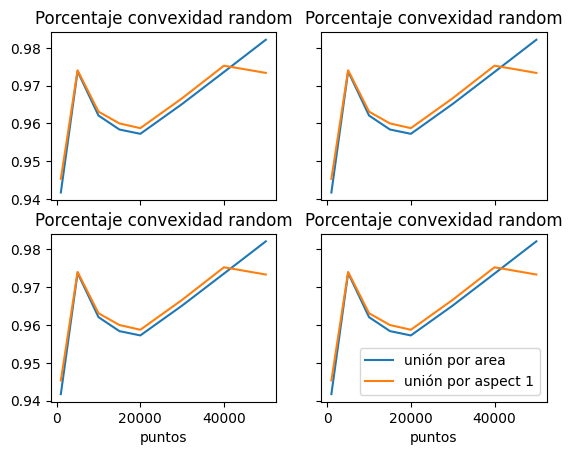

In [ ]:
print(polylla_inradoius)
fig, axs = plt.subplots(2,2)
d = 0
# print(polylla_inradoius[0][0][1])
for x in range(2):
    for y in range(2):
        # convex_polys_ir = [polylla_inradoius[i][d][1] for i in range(n_experiments)]
        convex_polys_a = [polylla_area[i][d][1] for i in range(n_experiments)]
        convex_polys_e1 = [polylla_e1[i][d][1] for i in range(n_experiments)]
        # convex_polys_e2 = [polylla_e2[i][d][1] for i in range(n_experiments)]
        # convex_polys_tra = [polylla_tra[i][d][1] for i in range(n_experiments)]
        print(convex_polys_a)

        # axs[x,y].plot(n_list,convex_polys_ir, label = 'unión por inradio')
        axs[x,y].plot(n_list, convex_polys_a, label = 'unión por area')
        axs[x,y].plot(n_list, convex_polys_e1, label = 'unión por aspect 1')
        # axs[x,y].plot(n_list, convex_polys_e2, label = 'unión por aspect 2')
        # axs[x,y].plot(n_list, convex_polys_tra, label = 'unión por triangle aspect')
        
        axs[x,y].set(xlabel = 'puntos')
        axs[x,y].set_title('Porcentaje convexidad ' + distributions[d])
        # d+= 1
for ax in axs.flat:
    ax.label_outer()
plt.legend()
plt.show()

[([0.27178049087524414, 0.9079837618403248, [0.2271307414754175, 0.00015774450481362398, 0.6143980881256411], [3.2212449255751014, 1, 14], [8.442489851150203, 4, 30], [0.9525688704940934, 0.00036173993522780137, 1.0000058145486537, 97.83491204330176], [0.9988801090353475, 0.8345876804900483, 1.176601566928227]], (1478, 367, 268, 241), (1033, 10068, 4761, 6339)), ([1.4148013591766357, 0.9341261513349656, [0.2784888115046035, 0.0004100530568971693, 0.6884988090388837], [3.1948233648128714, 1, 16], [8.389646729625744, 4, 34], [0.958377443828445, 1.1480578013569055e-07, 1.0000104889830266, 98.62422758540282], [0.9974522404718369, 0.8226403853801795, 1.2195568320064774]], (8577, 2427, 1778, 1452), (5008, 56342, 27403, 33946)), ([3.209573745727539, 0.9201940772963025, [0.2609482842702115, 2.74196129490158e-05, 0.8947795086407915], [3.248062015503876, 1, 20], [8.496124031007753, 4, 42], [0.9542899711579826, 3.438755072912692e-07, 1.0000115901768751, 98.19865038201996], [0.9978887972408989, 0.

IndexError: tuple index out of range

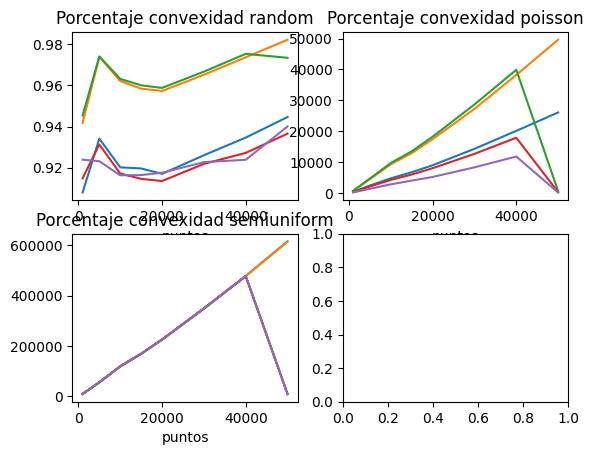

In [ ]:
print(polylla_inradoius)
fig, axs = plt.subplots(2,2)
d = 0
# print(polylla_inradoius[0][0][1])
experiments_names = ['Tiempo ejecución ','Porcentaje convexidad ']
n_metric = len(experiments_names)
for x in range(2):
    for y in range(2):
        convex_polys_ir = [polylla_inradoius[i][d][1] for i in range(n_experiments)]
        convex_polys_a = [polylla_area[i][d][1] for i in range(n_experiments)]
        convex_polys_e1 = [polylla_e1[i][d][1] for i in range(n_experiments)]
        convex_polys_e2 = [polylla_e2[i][d][1] for i in range(n_experiments)]
        convex_polys_tra = [polylla_tra[i][d][1] for i in range(n_experiments)]
        print(convex_polys_a)

        axs[x,y].plot(n_list,convex_polys_ir, label = 'unión por inradio')
        axs[x,y].plot(n_list, convex_polys_a, label = 'unión por area')
        axs[x,y].plot(n_list, convex_polys_e1, label = 'unión por aspect 1')
        axs[x,y].plot(n_list, convex_polys_e2, label = 'unión por aspect 2')
        axs[x,y].plot(n_list, convex_polys_tra, label = 'unión por triangle aspect')
        
        axs[x,y].set(xlabel = 'puntos')
        axs[x,y].set_title('Porcentaje convexidad ' + distributions[d])
        d+= 1
for ax in axs.flat:
    ax.label_outer()
plt.legend()
plt.show()